In [6]:
import struct
import numpy as np

In [13]:
train_img = 'C:/Users/pchavan/The Bridge/MLStuff/ANN_Practice/Kaggle_MNIST/train-images.idx3-ubyte'
train_lbl = 'C:/Users/pchavan/The Bridge/MLStuff/ANN_Practice/Kaggle_MNIST/train-labels.idx1-ubyte'
test_img = 'C:/Users/pchavan/The Bridge/MLStuff/ANN_Practice/Kaggle_MNIST/t10k-images.idx3-ubyte'
test_lbl = 'C:/Users/pchavan/The Bridge/MLStuff/ANN_Practice/Kaggle_MNIST/t10k-labels.idx1-ubyte'

In [14]:
def read_idx3_ubtype(filename):
    with open(filename, 'rb') as f:
        #The MNIST File content is big-endian unsigned int (>I)
        magic, = struct.unpack('>I', f.read(4))

        #0x00000803(2051) is for image file
        if magic == 2051:
            n_images, n_rows, n_cols = struct.unpack('>III', f.read(12))
            return np.fromfile(f, dtype=np.uint8).reshape(n_images, n_rows, n_cols) 
        else:
            n_lables, = struct.unpack('>I', f.read(4))
            return np.fromfile(f, dtype=np.uint8).reshape(n_lables, 1)

In [212]:
train_data = read_idx3_ubtype(train_img)
train_labels = read_idx3_ubtype(train_lbl)
test_data = read_idx3_ubtype(test_img)
test_labels = read_idx3_ubtype(test_lbl)

In [213]:
np.set_printoptions(linewidth=200)
train_data[8197]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6, 196, 255, 229,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 253, 254, 253, 251, 104,   0

In [214]:
#normaliez 
# Convert to float64
train_data = train_data.astype(np.float64) / 255.0
test_data = test_data.astype(np.float64) / 255.0

In [215]:
train_data[8197]

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 1. , 0.9, 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 1. , 1. , 1. , 1. , 0.4, 0. 

In [216]:
import matplotlib.pyplot as plt
%matplotlib inline

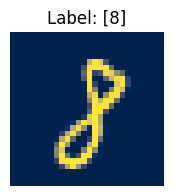

In [217]:
# Visualize a single image
plt.figure(figsize=(2,2))
image = train_data[8197]
label = train_labels[8197]
plt.imshow(image, cmap='cividis')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

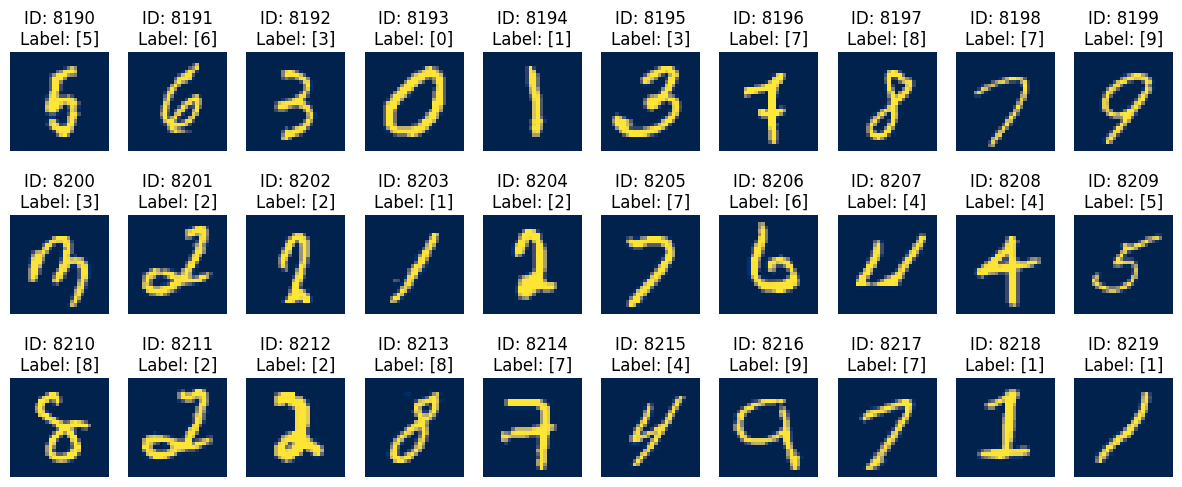

In [211]:
# Visualize a multiple images
def show_images(idx):
    n_plots = len(idx)
    n_cols = 10
    n_rows = np.max([1, int(n_plots / 10)])
    plt.figure(figsize=(15, n_rows*2))
    for i in range(len(idx)):
        plt.subplot(n_rows, n_cols, i + 1)
        image = train_data[idx[i]]
        label = train_labels[idx[i]]
        plt.imshow(image, cmap='cividis')
        plt.title(f"ID: {idx[i]}\nLabel: {label}")
        plt.axis('off')
    plt.show()

show_images(range(8190,8220, 1))